rete neurale Minst.
obiettivo:riconoscere l'immagine corrisponde a un numero. 
non necessita la normalizzazione. Il fit dura tempo. Numero di layer basso 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import joblib


In [2]:
data=pd.read_csv("./mnist_784_csv.csv")
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [8]:
colonne=data.columns
colonne=colonne[:-1]
colonne

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [11]:
X=data[colonne].values
y=data["class"]
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.85, random_state=0)


In [12]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1, max_iter=200)
#hidden_size: numero di nodi nascosti 100 100
#max iter. diciamo al modello di allenarsi 300 volte. impara sui set di allenamento
#per 300 volte scorriamo l'array e per ogni riga specifichiamo le carattteristiche dell'alieno


In [13]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1)

In [14]:
print(f"Accuratezza set TRAIN: {model.score(X_train, y_train)}")
print(f"Accuratezza set TEST: {model.score(X_test, y_test)}")

Accuratezza set TRAIN: 0.9920672268907563
Accuratezza set TEST: 0.9547619047619048


In [12]:
joblib.dump(model, 'modello_riconoscimento_numeri.pkl')


['modello_riconoscimento_numeri.pkl']

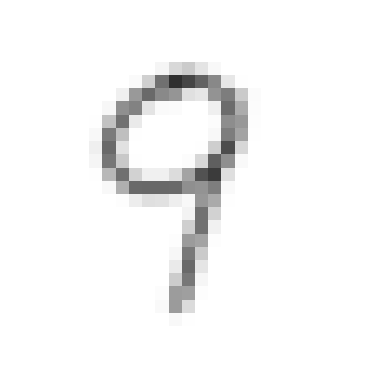

In [164]:
# Carica un'immagine
img = plt.imread("./9.png")

# Converti l'immagine in scala di grigi
img_gray = img.mean(axis=2)

# Inverti i valori dell'immagine (bianco diventa nero e viceversa)
max_value = np.max(img_gray)
img_inverted = max_value - img_gray

# Ridimensiona l'immagine a 28x28
img_resized = resize(img_inverted, (28, 28))

# Mostra l'immagine ridimensionata in bianco e nero con sfondo bianco e numero nero
plt.imshow(img_resized, cmap='binary', vmin=0, vmax=max_value)
plt.axis('off')  # Disabilita gli assi
plt.show()



In [157]:
(img_resized/np.max(img_resized)*255).astype(np.uint8)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,   5,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,
         81, 147, 163, 155, 115,  49,   8,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 133,
        197, 133, 108, 121, 167, 214, 136,  12,   0,   0,   0,   0,   0,
          0,   0],
       [  

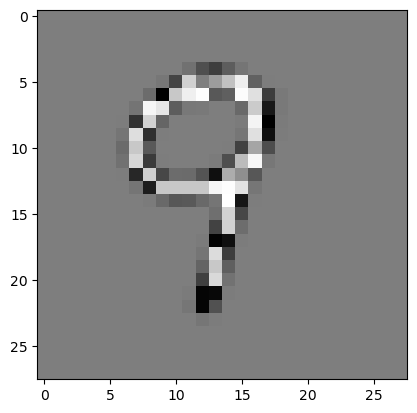

In [165]:
array_unidimensionale =(img_resized/np.max(img_resized)*255).astype(np.uint8).reshape((1, -1)).astype(np.int8)
plt.imshow(array_unidimensionale.reshape((28,-1)), cmap="binary")

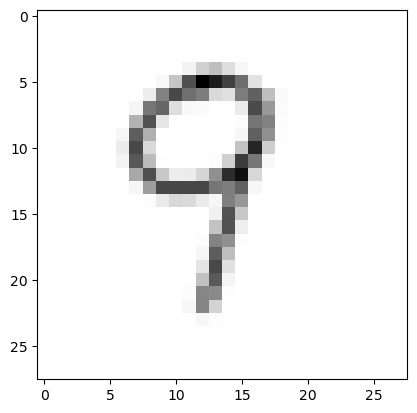

In [166]:
immagine=(img_resized/np.max(img_resized)*255).astype(np.uint8).copy()
plt.imshow(immagine.reshape((28,-1)), cmap="binary")
array_immagine=immagine.reshape((1, -1))

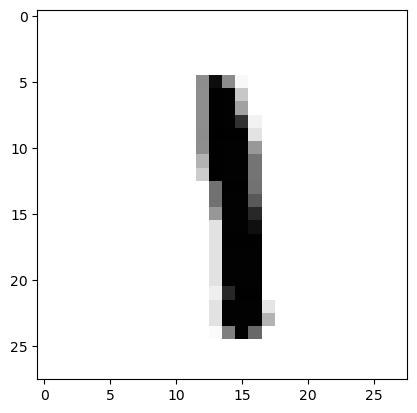

In [97]:
array_unidimensionale =(img_resized/np.max(img_resized)*255).astype(np.uint8).reshape((1, -1)).astype(np.int8)
plt.imshow(X_test[2].reshape((28,-1)), cmap="binary")

In [167]:
model.predict(array_immagine)


array([9], dtype=int64)

In [109]:
X_test[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 242, 116,   7,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 11

In [77]:
model.predict_proba(array_immagine)

array([[1.11675832e-04, 9.49292723e-07, 3.54020812e-03, 9.70857046e-01,
        2.82797404e-06, 1.36473949e-03, 1.15121447e-06, 1.09551943e-07,
        2.38130027e-02, 3.08290220e-04]])

In [115]:
y_test

10840    0
56267    4
14849    1
62726    2
47180    7
        ..
43003    1
45128    0
16895    2
66915    4
26883    2
Name: class, Length: 10500, dtype: int64

In [135]:
img_resized*255

array([[248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002],
       [248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002],
       [248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
        248.25002, 248.25002, 248.25002, 248.25002, 248.25002, 248.25002,
      

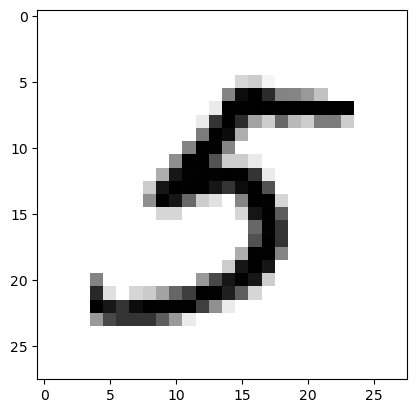

In [141]:
plt.imshow(X_test[22].reshape((28,28)), cmap="binary")

In [305]:
np.where(y_test==5)

(array([   22,    25,    31,    39,    47,    53,    54,    56,    61,
           65,    76,    81,    89,    93,   145,   151,   163,   164,
          165,   176,   178,   192,   195,   219,   286,   298,   311,
          348,   362,   379,   383,   392,   401,   404,   415,   423,
          425,   426,   441,   442,   451,   470,   479,   494,   499,
          519,   543,   577,   583,   594,   597,   605,   680,   681,
          695,   701,   710,   714,   724,   750,   754,   759,   772,
          786,   797,   801,   802,   803,   816,   819,   836,   850,
          864,   875,   877,   887,   897,   932,   940,   942,   951,
          956,   959,   963,  1004,  1027,  1036,  1049,  1074,  1077,
         1080,  1131,  1148,  1151,  1170,  1181,  1192,  1196,  1202,
         1219,  1225,  1239,  1290,  1301,  1331,  1335,  1379,  1395,
         1404,  1429,  1432,  1436,  1444,  1455,  1483,  1487,  1501,
         1503,  1520,  1547,  1548,  1553,  1556,  1561,  1565,  1581,
      

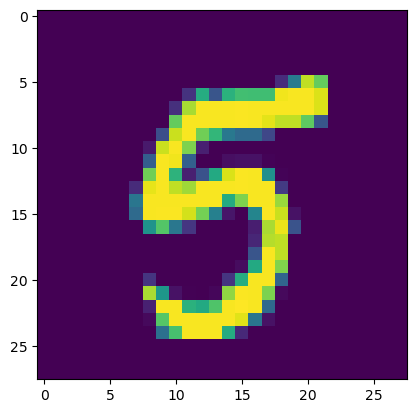

In [308]:
plt.imshow(X_test[4211].reshape((28,28)))

In [104]:
np.where(data[data["class"]==1])

(array([   0,    0,    0, ..., 7876, 7876, 7876], dtype=int64),
 array([158, 159, 160, ..., 656, 657, 784], dtype=int64))